### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### Initializing the CNN

In [26]:

classifier = Sequential()

### Data augmentation and preprocessing

In [24]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

### Loading the data

In [25]:
training_set = train_datagen.flow_from_directory('E:\\MTech\\2nd Sem\\ME698G (DL)\\Assignment\\A2\\train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('E:\\MTech\\2nd Sem\\ME698G (DL)\\Assignment\\A2\\test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 3996 images belonging to 2 classes.


### First convolution, batch normalization, and max pooling

In [27]:

classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

### Second convolution, batch normalization, and max pooling

In [28]:

classifier.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

### Third convolution, batch normalization, and max pooling

In [29]:

classifier.add(Convolution2D(128, (3, 3), activation='relu', padding='same'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

### Flattening

In [30]:

classifier.add(Flatten())

### Full connection with dropout

In [31]:

classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1, activation='sigmoid'))

### Model summary

In [32]:

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                      

### Compiling the model

In [33]:

classifier.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Training the model

In [35]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = classifier.fit(training_set,
                        epochs=25,
                        validation_data=test_set,
                        callbacks=[early_stopping])

Epoch 1/25
782/782 [==============================] - 614s 785ms/step - loss: 0.2461 - accuracy: 0.8981 - val_loss: 0.2648 - val_accuracy: 0.8921
Epoch 2/25
782/782 [==============================] - 238s 304ms/step - loss: 0.2303 - accuracy: 0.9047 - val_loss: 0.1824 - val_accuracy: 0.9277
Epoch 3/25
782/782 [==============================] - 234s 299ms/step - loss: 0.2153 - accuracy: 0.9110 - val_loss: 0.2111 - val_accuracy: 0.9107
Epoch 4/25
782/782 [==============================] - 230s 294ms/step - loss: 0.2027 - accuracy: 0.9178 - val_loss: 0.1887 - val_accuracy: 0.9222
Epoch 5/25
782/782 [==============================] - 238s 304ms/step - loss: 0.1922 - accuracy: 0.9221 - val_loss: 0.1615 - val_accuracy: 0.9359
Epoch 6/25
782/782 [==============================] - 242s 310ms/step - loss: 0.1865 - accuracy: 0.9242 - val_loss: 0.1859 - val_accuracy: 0.9287
Epoch 7/25
782/782 [==============================] - 229s 292ms/step - loss: 0.1738 - accuracy: 0.9294 - val_loss: 0.1843 -

### Evaluation of the model on the test set

In [36]:

test_loss, test_accuracy = classifier.evaluate(test_set)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

125/125 [==============================] - 32s 259ms/step - loss: 0.1176 - accuracy: 0.9567
Test Loss: 0.11758321523666382, Test Accuracy: 0.956706702709198


### Function to predict a single image

In [37]:

def predict_image(imagepath, classifier):
    predict = image.load_img(imagepath, target_size=(64, 64))
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis=0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print(f"probability = {probability}")
        print(f"Prediction = {prediction}")
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print(f"probability = {probability}")
        print(f"Prediction = {prediction}")

### Test prediction

In [38]:

predict_image("E:\\Downloads\\cat\\cat\\6.jpg",classifier)

probability = 0.9930839538574219
Prediction = dog


### Plot training and validation metrics (Accuracy plot, Loss plot)

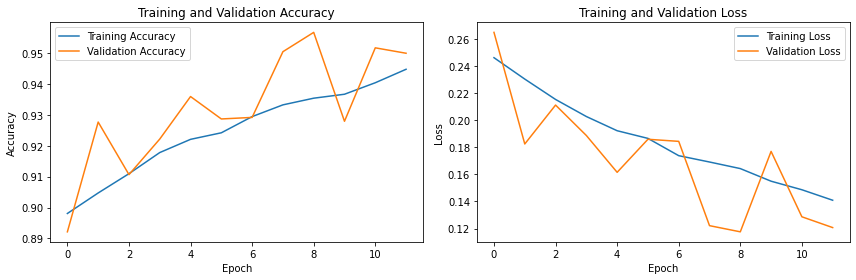

In [39]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Saving the model

In [40]:

classifier.save("Modelv2.keras")